In [549]:
import pandas as pd
import numpy as np
import csv
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import pydotplus
import os
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz 
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 2000)

In [550]:
data = pd.read_csv('alldata.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [551]:
dataset = data 

In [552]:
dataset['SATISFACTION_JOB'].unique()

array(['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied',
       'Very dissatisfied'], dtype=object)

In [553]:
dataset['SATISFACTION_JOB'].isnull().sum()

0

In [554]:
dataset.isnull().sum()

REFID                                         0
AGE                                           0
GENDER                                        0
MINORITY                                      0
RACE                                          0
BIRTH_PLACE                                   0
US_CITIZENSHIP                                0
US_CITIZEN_TYPE                               0
TOTAL_CHILDREN                                0
HOURS_WORKED                                  0
 SALARY                                       0
HAVE_HEALTH_CARE                              0
HAVE_PENSION                                  0
HAVE_PROFIT_SHARE                             0
HAVE_VACATION                                 0
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE        0
PRINCIPAL_POSITION                            0
PRINCIPAL_MAJOR_GROUP                         0
EMPLOYER_SECTOR                               0
EMPLOYER_SIZE                                 0
WORK_ACTIVITY                           

In [555]:
SATISFACTION_JOB = []

for row in dataset['SATISFACTION_JOB']:
    if row in ['Very satisfied']:
        SATISFACTION_JOB.append('1')
    elif row in ['Somewhat satisfied']:
        SATISFACTION_JOB.append('2')
    elif row in ['Somewhat dissatisfied']:
        SATISFACTION_JOB.append('3')
    else:
        SATISFACTION_JOB.append('4')

    
dataset['SATISFACTION_JOB'] = SATISFACTION_JOB

In [556]:
dataset['FIELD_MAJOR_RECENT_DEGREE'].fillna('None', inplace=True)

In [557]:
dataset.isnull().sum()

REFID                                      0
AGE                                        0
GENDER                                     0
MINORITY                                   0
RACE                                       0
BIRTH_PLACE                                0
US_CITIZENSHIP                             0
US_CITIZEN_TYPE                            0
TOTAL_CHILDREN                             0
HOURS_WORKED                               0
 SALARY                                    0
HAVE_HEALTH_CARE                           0
HAVE_PENSION                               0
HAVE_PROFIT_SHARE                          0
HAVE_VACATION                              0
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE     0
PRINCIPAL_POSITION                         0
PRINCIPAL_MAJOR_GROUP                      0
EMPLOYER_SECTOR                            0
EMPLOYER_SIZE                              0
WORK_ACTIVITY                              0
WORK_ACTIVITY_SUM                          0
WORK_ACTIV

In [558]:
dataset['AGE'] = pd.to_numeric(data['AGE'])

In [559]:
bins = [20, 30,  40,  50,  60,  70,  80]
dataset['AGE_BINS'] = pd.cut(dataset['AGE'], bins)

In [560]:
dataset['SALARY_NEW'] = dataset[' SALARY '].str.replace('$', '')

In [561]:
dataset['SALARY_NEW'] = dataset['SALARY_NEW'].str.replace(',', '')

In [562]:
dataset['SALARY'] = dataset['SALARY_NEW'].str.replace(' -   ', '')

In [563]:
dataset = dataset.drop('SALARY_NEW', axis=1)

In [564]:
dataset['SALARY'] = pd.to_numeric(dataset['SALARY'], errors='coerce')

In [565]:
bins = [0, 5000, 10000, 20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 200000]
dataset['SALARY_BINS'] = pd.cut(dataset['SALARY'], bins)

In [566]:
dataset = dataset.drop('SALARY', axis=1)

In [567]:
dataset.sample(5)

,REFID,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER,AGE_BINS,SALARY_BINS
40597,E11514734,53,Male,No,White,Not in the US,Yes,By naturalization,None,Greater than 40 hours,"$125,000.00",Yes,Yes,No,Yes,Closely related,Other management related occupations,Non-science and engineering occupations,Business or industry,25000+ employees,Professional services,Other,"Sales, purchasing, marketing",Management and Administration,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,2 memberships,Yes,No,No,No,No,No,No,No,No,No,1,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Yes,For certification,No,No,Yes,No,No,No,Yes,No,Yes,No,Master,Economics,Social and related sciences,No,No,No,No,No,No,No,No,"(50, 60]","(100000, 200000]"
19673,E11064524,60,Male,No,Asian,Not in the US,Yes,By naturalization,None,36 - 40 hours,"$51,000.00",Yes,Yes,No,Yes,Closely related,Civil engineers,Engineers,Government,5000-24999 employees,Management and Administration,Management and Administration,Other work activity,Other,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No memberships,No,No,No,No,No,No,No,No,No,No,2,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat dissatisfied,Somewhat satisfied,Very satisfied,No,Other,No,No,No,No,No,No,No,Yes,No,No,Bachelor,Civil engineering,Engineering,No,No,No,No,No,No,No,No,"(50, 60]","(50000, 60000]"
53410,E11773439,27,Female,No,White,United States,Yes,Born in US or US territories,None,36 - 40 hours,"$50,000.00",No,No,Yes,Yes,Closely related,Health-related occupations,Science and engineering related occupations,Business or industry,25000+ employees,Professional services,Other,Teaching,Teaching,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,1 membership,No,No,No,No,No,No,No,No,No,No,2,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat sat

In [568]:
exploreme = dataset

In [569]:
modelme = dataset

In [628]:
modelmetwo = dataset

In [570]:
backupdata = dataset

In [571]:
backmeup = dataset

In [572]:
checkme = dataset 

In [573]:
modelme = modelme.drop('REFID', axis=1)

In [574]:
modelme = modelme.drop('SALARY_BINS', axis=1)

In [575]:
modelme = modelme.drop('AGE_BINS', axis=1)

In [576]:
modelme = modelme.drop(' SALARY ', axis=1)

In [577]:
modelme = modelme.drop('AGE', axis=1)

In [578]:
X = modelme.drop('SATISFACTION_JOB', axis=1)

In [579]:
yone = modelme['SATISFACTION_JOB']

In [580]:
yone.unique()

array(['1', '2', '3', '4'], dtype=object)

In [581]:
y_colnameone = yone.replace(to_replace=1, value = "Very satisfied")

In [582]:
y_colnametwo = y_colnameone.replace(to_replace=2, value = "Somewhat satisfied")

In [583]:
y_colnamethree = y_colnametwo.replace(to_replace=3, value = "Somewhat dissatisfied")

In [584]:
y_colnamefour = y_colnamethree.replace(to_replace=4, value = "Very dissatisfied")

In [585]:
y_col = y_colnamefour

In [586]:
X = X.apply(LabelEncoder().fit_transform)

In [587]:
yone = yone.astype(str).astype(int)

In [588]:
y = yone

In [589]:
y.values

array([1, 1, 2, ..., 2, 1, 2])

In [590]:
y.to_numpy()

array([1, 1, 2, ..., 2, 1, 2])

In [591]:
X.shape

(62373, 86)

In [592]:
y.shape

(62373,)

In [593]:
y_colnameone = yone.replace(to_replace=1, value = "Very satisfied")

In [594]:
y_colnametwo = y_colnameone.replace(to_replace=2, value = "Somewhat satisfied")

In [595]:
y_colnamethree = y_colnametwo.replace(to_replace=3, value = "Somewhat dissatisfied")

In [596]:
#y_colnamethree

In [597]:
y_colnamefour = y_colnamethree.replace(to_replace=4, value = "Very dissatisfied")

In [598]:
#y_colnamefour

In [599]:
y_colnames = y_colnamefour

In [600]:
#y_colnames


In [601]:
X_colnames = X.columns

In [602]:
modelme_columns = modelme.columns

In [603]:
#y_colnames
#X_colnames

In [604]:
X.shape

(62373, 86)

In [605]:
y.shape

(62373,)

In [606]:
X_backup = X

In [607]:
y_backup = y

In [608]:
X_backupone = X

In [609]:
y_backupone = y

In [610]:
X_backuptwo = X

In [611]:
y_backuptwo = y

In [612]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [613]:
dtree_score1 =[];dtree_score2 =[];dtree_score3 =[];dtree_score4 =[]

In [614]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 4);dtree.fit(X_train, y_train)
dtree_score1.append(dtree.score(X_test, y_test))

In [615]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 8);dtree.fit(X_train, y_train)
dtree_score2.append(dtree.score(X_test, y_test))

In [616]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 12);dtree.fit(X_train, y_train)
dtree_score3.append(dtree.score(X_test, y_test))

In [617]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 16);dtree.fit(X_train, y_train)
dtree_score4.append(dtree.score(X_test, y_test))

Text(0, 0.5, 'Test Accuracy')

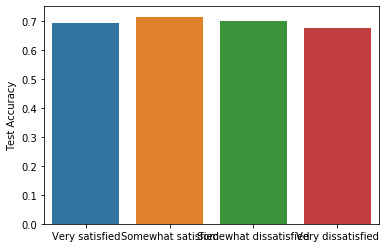

In [618]:
sns.barplot(data=[dtree_score1, dtree_score2, dtree_score3, dtree_score4])
plt.xticks([0,1,2,3], ['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied', 'Very dissatisfied'])
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Test Accuracy')

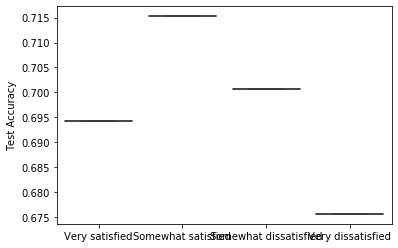

In [619]:
sns.boxplot(data=[dtree_score1, dtree_score2, dtree_score3, dtree_score4])
plt.xticks([0,1,2,3], ['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied', 'Very dissatisfied'])
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Test Accuracy')

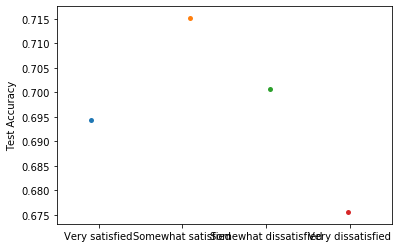

In [620]:
sns.stripplot(data=[dtree_score1, dtree_score2, dtree_score3, dtree_score4])
plt.xticks([0,1,2,3], ['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied', 'Very dissatisfied'])
plt.ylabel('Test Accuracy')

In [621]:
print(); print(modelme[modelme_columns].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62373 entries, 0 to 62372
Data columns (total 87 columns):
GENDER                                     62373 non-null object
MINORITY                                   62373 non-null object
RACE                                       62373 non-null object
BIRTH_PLACE                                62373 non-null object
US_CITIZENSHIP                             62373 non-null object
US_CITIZEN_TYPE                            62373 non-null object
TOTAL_CHILDREN                             62373 non-null object
HOURS_WORKED                               62373 non-null object
HAVE_HEALTH_CARE                           62373 non-null object
HAVE_PENSION                               62373 non-null object
HAVE_PROFIT_SHARE                          62373 non-null object
HAVE_VACATION                              62373 non-null object
PRINCIPAL_POSITION_RELATED_HIGH_DEGREE     62373 non-null object
PRINCIPAL_POSITION                         62

In [622]:
modelme[modelme_columns].describe()

,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,HOURS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
count,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373,62373
unique,2,2,3,2,2,4,3,4,2,2,2,2,3,26,7,5,8,14,5,15,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,2,8,9,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,2,8,2,2,2,2,2,2,2,2,2,2,5,20,7,2,2,2,2,2,2,2,2
top,Male,No,White,United States,Yes,Born in US or US territories,None,Greater than 40 hours,Yes,Yes,No,Yes,Closely related,Other Non-science and engineering occupations,Non-science and engineering occupations,Business or industry,25000+ employees,Professional services,Management and Administration,No Secondary Activity,Management and Administration,No,No,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No memberships,No,No,No,No,No,No,No,No,No,No,2,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Yes,Other,No,No,No,No,No,No,Yes,Yes,No,No,Bachelor,Health-related fields,Engineering,No,No,No,No,No,No,No,No
freq,35049,47995,37217,46337,55204,46325,36547,26154,52134,44592,46023,51518,38718,12235,22457,41223,13344,10563,19565,11159,22111,54600,48679,32817,37733,32707,48707,51813,41149,43231,48097,34614,54612,51003,45057,45208,43017,42703,46275,38551,44412,47181,39934,32195,37916,53496,53496,58706,57993,60246,58057,58781,61318,57214,28714,27013,26071,27433,36197,34729,29078,30824,27467,30314,38629,23744,58969,39112,45145,45429,61895,50324,36370,34929,42634,49260,33341,8007,13517,57360,58211,60313,59416,60388,59357,56897,58977


In [623]:
#AGE === MEAN 40 YEARS OLD  25% = 29, 50% = 36, 75% = 50, MAX = 75, MIN = 23, STD = 12.5

In this dataset we have:
    
    Mostly Male, 
    
    Mostly White, 
    
    Born in the US and have US Citizenship, 
    
    No Children, 
    
    Works Greater than 40 hours, 
    
    Have Health Care, 
    
    Have_Pension, 
    
    No Profit Share, 
    
    Have Vacation, 
    
    Works Closely Related Degree, 
    
    Principal Postion is Other non-science and engineering occupations, 
    
    Major Group of Principal Position is Non-Science and engineering occupations,
    
    Employer Sector is Business or Industry, 
    
    Employer size is 25000+ employees, 
    
    Work Activity is Professional Services, 
    
    Work Activity Summary is Management and Administration, 
    
    No to Computer, 
    
    No to Development and Design, 
    
    Yes to Management Sales, 
    
    No to Research and Development, 
    
    Yes to Research, Development and Teaching, 
    
    Yes to Management Admin, 
    
    No memberships,
    
    No to working outside of degree, 
    
    Employees are Somewhat Satisfaction to Job,
    
    Job Advancement is Somewhat Satisfaction,
    
    Job Benefits is Somewhat Satisfaction,
    
    Job Challenges is Very Satisfied, 
    
    Job Independce is Very Satisfied, 
    
    Job Locations is Very Satisfied,
    
    Job Salary is Somewhat Satisfaction, 
    
    Job Security is Very Satisfied, 
    
    Contribute to Society is Very Satisfied,
    
    Willing Attend work training, 
    
    Willing Attend other training, 
    
    Willing to obtain new skills, 
    
    Job require natural sciences, 
    
    Recent degree Bachelor,
    
    Major degree in Health Care, 
    
    Marjor degree in group is Engineering 
    

In statistical analysis of binary classification, the F1 score (also F-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall). The F1 score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC).


The F-score is also used for evaluating classification problems with more than two classes (Multiclass classification). In this setup, the final score is obtained by micro-averaging (biased by class frequency) or macro-averaging (taking all classes as equally important). For macro-averaging, two different formulas have been used by applicants: the F-score of (arithmetic) class-wise precision and recall means or the arithmetic mean of class-wise F-scores, where the latter exhibits more desirable properties.


In [624]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)
for n, s in zip(modelme, Selector_f.scores_):
    print('F-score: %3.2f\t for feature %s ' % (s,n))

F-score: 57.92	 for feature GENDER 
F-score: 172.67	 for feature MINORITY 
F-score: 390.90	 for feature RACE 
F-score: 125.89	 for feature BIRTH_PLACE 
F-score: 64.19	 for feature US_CITIZENSHIP 
F-score: 116.95	 for feature US_CITIZEN_TYPE 
F-score: 148.63	 for feature TOTAL_CHILDREN 
F-score: 112.31	 for feature HOURS_WORKED 
F-score: 150.93	 for feature HAVE_HEALTH_CARE 
F-score: 339.16	 for feature HAVE_PENSION 
F-score: 336.00	 for feature HAVE_PROFIT_SHARE 
F-score: 99.11	 for feature HAVE_VACATION 
F-score: 1276.67	 for feature PRINCIPAL_POSITION_RELATED_HIGH_DEGREE 
F-score: 53.05	 for feature PRINCIPAL_POSITION 
F-score: 34.51	 for feature PRINCIPAL_MAJOR_GROUP 
F-score: 1.65	 for feature EMPLOYER_SECTOR 
F-score: 14.66	 for feature EMPLOYER_SIZE 
F-score: 46.33	 for feature WORK_ACTIVITY 
F-score: 61.30	 for feature WORK_ACTIVITY_SUM 
F-score: 22.10	 for feature WORK_ACTIVITY_SECOND 
F-score: 23.34	 for feature WORK_ACTIVITY_SCEOND_SUM 
F-score: 14.90	 for feature COMPUTER 
F

Using the level of association output (higher vlaues signal more assciation of the feature with the target varible). This helps choose the most important varibles for your machince learning model. 

# MODEL ONE

In [625]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
crossvalidation = KFold(n_splits=6,
                       shuffle=True,
                       random_state=1111)

In [626]:
import numpy as np 
from sklearn import tree
for depth in range(1,20):
    tree_classifier = tree.DecisionTreeClassifier(
    max_depth=depth, random_state=1111)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, 
                                   X,y,
                                   scoring = 'accuracy',
                                   cv=crossvalidation))
    print('Depth: %i Accuracy: %.3f' % (depth,score))

Depth: 1 Accuracy: 0.658
Depth: 2 Accuracy: 0.659
Depth: 3 Accuracy: 0.660
Depth: 4 Accuracy: 0.693
Depth: 5 Accuracy: 0.701
Depth: 6 Accuracy: 0.709
Depth: 7 Accuracy: 0.714
Depth: 8 Accuracy: 0.718
Depth: 9 Accuracy: 0.716
Depth: 10 Accuracy: 0.712
Depth: 11 Accuracy: 0.707
Depth: 12 Accuracy: 0.702
Depth: 13 Accuracy: 0.693
Depth: 14 Accuracy: 0.686
Depth: 15 Accuracy: 0.676
Depth: 16 Accuracy: 0.668
Depth: 17 Accuracy: 0.661
Depth: 18 Accuracy: 0.654
Depth: 19 Accuracy: 0.647


Depth: 8 Accuracy: 0.718

In [627]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
tree_classifier = DecisionTreeClassifier(random_state=1111)
crossvalidation = KFold(n_splits=6, shuffle=True, random_state=1111)
bagging = BaggingClassifier(tree_classifier, 
                           max_samples=0.8, 
                           max_features=0.8,
                           n_estimators=500)
scores = np.mean(cross_val_score(bagging, X, y,
                                scoring='accuracy',
                                cv=crossvalidation))
print('Accuracy: %.3f' % scores)

Accuracy: 0.739
